<a href="https://colab.research.google.com/github/MLTeam6-2021/Machine-Learning-Internship/blob/module2/Srishti_Module2/Tapas_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import re
from nltk.util import ngrams
from collections import Counter
import csv
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk

In [2]:
train = pd.read_csv(r'/content/sample_data/Tapas_announcement.csv')

In [3]:
train_new = train[train['Topic Title'].notnull()]

In [4]:
train.head()

,Unnamed: 0,Topic Title,Category,Leading Post,Post Replies,Created at,Num Replies
0,0,The Two Other Species (Novel),Announcements,"Hello everyone, My name is Genr not my real na...",[],"Jul 19, 2021 3:11 am",This topic has 0 replies
1,1,"“Lanche”, a textless comic [one-shot]",Announcements,Hey there! \nDAKÍCORP's comics have been broug...,[],"Jul 18, 2021 5:54 pm",This topic has 0 replies
2,2,Moon Violations Unit - Episode 1 complete,Announcements,Huge story ahead. Comments/Subs very welcome.\...,['What a great and refreshing new comic. (in r...,"Jul 11, 2021 8:51 am",This topic has 4 replies
3,3,"Introducing Lauren, Community Marketing Intern",Announcements,Welcome Lauren!,"['Hi Lauren, welcome~ ', 'Oh dang! Welcome, La...","Jun 22, 2021 5:40 pm",This topic has 24 replies with an extremely hi...
4,4,✨⁠ Tapas Milestone Assets for Creators ✨⁠,Announcements,Just need 4k more...,['this is cool thanks! the milestone are edita...,"May 26, 2021 11:49 am",This topic has 10 replies with an extremely hi...


In [22]:
# No. of words in every title of this category
train['word_count'] = train['Topic Title'].apply(lambda x: len(str(x).split(" ")))
train[['Topic Title','word_count']].head(500)

,Topic Title,word_count
0,The Two Other Species (Novel),5
1,"“Lanche”, a textless comic [one-shot]",5
2,Moon Violations Unit - Episode 1 complete,7
3,"Introducing Lauren, Community Marketing Intern",5
4,✨⁠ Tapas Milestone Assets for Creators ✨⁠,7
...,...,...
114,Buttons! BUTTons!,2
115,Tapastic’s Chief Product Officer featured on C...,7
116,Publisher Update: Changes to Genre Feature,6
117,Emoji/Emoticons,1


In [21]:
# No. of characters in each title
train['char_count'] = train['Topic Title'].str.len() 
train[['Topic Title','char_count']].head(500)

,Topic Title,char_count
0,The Two Other Species (Novel),29
1,"“Lanche”, a textless comic [one-shot]",37
2,Moon Violations Unit - Episode 1 complete,41
3,"Introducing Lauren, Community Marketing Intern",46
4,✨⁠ Tapas Milestone Assets for Creators ✨⁠,41
...,...,...
114,Buttons! BUTTons!,17
115,Tapastic’s Chief Product Officer featured on C...,56
116,Publisher Update: Changes to Genre Feature,42
117,Emoji/Emoticons,15


In [20]:
# Average word length of each title
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

train_new['avg_word'] = train_new['Topic Title'].apply(lambda x: avg_word(x))
train_new[['Topic Title','avg_word']].head(500)

,Topic Title,avg_word
0,The Two Other Species (Novel),5.000000
1,"“Lanche”, a textless comic [one-shot]",6.600000
2,Moon Violations Unit - Episode 1 complete,5.000000
3,"Introducing Lauren, Community Marketing Intern",8.400000
4,✨⁠ Tapas Milestone Assets for Creators ✨⁠,5.000000
...,...,...
114,Buttons! BUTTons!,8.000000
115,Tapastic’s Chief Product Officer featured on C...,7.142857
116,Publisher Update: Changes to Genre Feature,6.166667
117,Emoji/Emoticons,15.000000


In [19]:
# No. of stopwords in each title
stop = stopwords.words('english')

train_new['stopwords'] = train_new['Topic Title'].apply(lambda x: len([x for x in x.split() if x in stop]))
train_new[['Topic Title','stopwords']].head(500)

,Topic Title,stopwords
0,The Two Other Species (Novel),0
1,"“Lanche”, a textless comic [one-shot]",1
2,Moon Violations Unit - Episode 1 complete,0
3,"Introducing Lauren, Community Marketing Intern",0
4,✨⁠ Tapas Milestone Assets for Creators ✨⁠,1
...,...,...
114,Buttons! BUTTons!,0
115,Tapastic’s Chief Product Officer featured on C...,1
116,Publisher Update: Changes to Genre Feature,1
117,Emoji/Emoticons,0


In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
# No. of special words (exclamations) in each title
train_new['Exclamations'] = train_new['Topic Title'].apply(lambda x: len([x for x in x.split() if x.endswith('!')]))
train_new[['Topic Title','Exclamations']].head(500)

,Topic Title,Exclamations
0,The Two Other Species (Novel),0
1,"“Lanche”, a textless comic [one-shot]",0
2,Moon Violations Unit - Episode 1 complete,0
3,"Introducing Lauren, Community Marketing Intern",0
4,✨⁠ Tapas Milestone Assets for Creators ✨⁠,0
...,...,...
114,Buttons! BUTTons!,2
115,Tapastic’s Chief Product Officer featured on C...,0
116,Publisher Update: Changes to Genre Feature,0
117,Emoji/Emoticons,0


In [17]:
# No. of numerics in titles
train_new['numerics'] = train_new['Topic Title'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
train_new[['Topic Title','numerics']].head(500)

,Topic Title,numerics
0,The Two Other Species (Novel),0
1,"“Lanche”, a textless comic [one-shot]",0
2,Moon Violations Unit - Episode 1 complete,1
3,"Introducing Lauren, Community Marketing Intern",0
4,✨⁠ Tapas Milestone Assets for Creators ✨⁠,0
...,...,...
114,Buttons! BUTTons!,0
115,Tapastic’s Chief Product Officer featured on C...,0
116,Publisher Update: Changes to Genre Feature,0
117,Emoji/Emoticons,0


In [23]:
# No. of uppercase words in title
train_new['upper'] = train_new['Topic Title'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
train_new[['Topic Title','upper']].head(500)

,Topic Title,upper
0,The Two Other Species (Novel),0
1,"“Lanche”, a textless comic [one-shot]",0
2,Moon Violations Unit - Episode 1 complete,0
3,"Introducing Lauren, Community Marketing Intern",0
4,✨⁠ Tapas Milestone Assets for Creators ✨⁠,0
...,...,...
114,Buttons! BUTTons!,0
115,Tapastic’s Chief Product Officer featured on C...,0
116,Publisher Update: Changes to Genre Feature,0
117,Emoji/Emoticons,0


In [24]:
# Transforming titles into lowercase
train_new['Topic Title'] = train_new['Topic Title'].apply(lambda x: " ".join(x.lower() for x in x.split()))
train_new['Topic Title'].head(500)

0                          the two other species (novel)
1                  “lanche”, a textless comic [one-shot]
2              moon violations unit - episode 1 complete
3         introducing lauren, community marketing intern
4              ✨⁠ tapas milestone assets for creators ✨⁠
                             ...                        
114                                    buttons! buttons!
115    tapastic’s chief product officer featured on c...
116           publisher update: changes to genre feature
117                                      emoji/emoticons
118                    #primetime ad payment discrepancy
Name: Topic Title, Length: 119, dtype: object

In [26]:
# Removing punctuation in title
train['Topic Title'] = train['Topic Title'].str.replace('[^\w\s]','')
train['Topic Title'].head()

0                      The Two Other Species Novel
1                  Lanche a textless comic oneshot
2         Moon Violations Unit  Episode 1 complete
3    Introducing Lauren Community Marketing Intern
4             Tapas Milestone Assets for Creators 
Name: Topic Title, dtype: object

In [27]:
# Removing stopwrds from title
from nltk.corpus import stopwords
stop = stopwords.words('english')
train_new['Topic Title'] = train_new['Topic Title'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
train_new['Topic Title'].head(500)

0                                    two species (novel)
1                    “lanche”, textless comic [one-shot]
2              moon violations unit - episode 1 complete
3         introducing lauren, community marketing intern
4                  ✨⁠ tapas milestone assets creators ✨⁠
                             ...                        
114                                    buttons! buttons!
115    tapastic’s chief product officer featured citi...
116              publisher update: changes genre feature
117                                      emoji/emoticons
118                    #primetime ad payment discrepancy
Name: Topic Title, Length: 119, dtype: object

In [28]:
# Removing common words from title
freq = pd.Series(' '.join(train['Topic Title']).split()).value_counts()[:10]

In [29]:
freq

Tapastic    35
and         29
Update      21
Tapas       16
for         13
New         11
the         11
Support     10
on           8
to           8
dtype: int64

In [30]:
train_data = train.copy()

In [31]:
freq = list(freq.index)
train['Topic Title'] = train['Topic Title'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
train['Topic Title'].head()

0                      The Two Other Species Novel
1                  Lanche a textless comic oneshot
2          Moon Violations Unit Episode 1 complete
3    Introducing Lauren Community Marketing Intern
4                        Milestone Assets Creators
Name: Topic Title, dtype: object

In [32]:
# Removing rare words from title
freq = pd.Series(' '.join(train['Topic Title']).split()).value_counts()[-10:]
freq

2016             1
its              1
Collaboration    1
posted           1
AGAIN            1
Madefire         1
comics           1
StaffPinned      1
Dec              1
Design           1
dtype: int64

In [33]:
freq = list(freq.index)
train['Topic Title'] = train['Topic Title'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
train['Topic Title'].head()

0                      The Two Other Species Novel
1                  Lanche a textless comic oneshot
2          Moon Violations Unit Episode 1 complete
3    Introducing Lauren Community Marketing Intern
4                        Milestone Assets Creators
Name: Topic Title, dtype: object

In [34]:
!pip install textblob

In [36]:
# Spelling correction
from textblob import TextBlob
train['Topic Title'][:5].apply(lambda x: str(TextBlob(x).correct()))

0                   The Two Other Species Novel
1                Dance a restless comic oneshot
2       Soon Violations Knit Episode 1 complete
3    Introducing Aren Community Marketing Enter
4                        Limestone Sets Orators
Name: Topic Title, dtype: object

In [37]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [38]:
# Tokenization
TextBlob(train['Topic Title'][1]).words

WordList(['Lanche', 'a', 'textless', 'comic', 'oneshot'])

In [39]:
# Stemming
from nltk.stem import PorterStemmer
st = PorterStemmer()
train['Topic Title'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0               the two other speci novel
1          lanch a textless comic oneshot
2       moon violat unit episod 1 complet
3    introduc lauren commun market intern
4                  mileston asset creator
Name: Topic Title, dtype: object

In [40]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [41]:
# Lemmatization
from textblob import Word
train['Topic Title'] = train['Topic Title'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
train['Topic Title'].head()

0                      The Two Other Species Novel
1                  Lanche a textless comic oneshot
2          Moon Violations Unit Episode 1 complete
3    Introducing Lauren Community Marketing Intern
4                        Milestone Assets Creators
Name: Topic Title, dtype: object

In [42]:
# N-grams
TextBlob(train['Topic Title'][1]).ngrams(2)

[WordList(['Lanche', 'a']),
 WordList(['a', 'textless']),
 WordList(['textless', 'comic']),
 WordList(['comic', 'oneshot'])]

In [43]:
# tf
tf1 = (train['Topic Title'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

,words,tf
0,a,1
1,Lanche,1
2,textless,1
3,comic,1
4,oneshot,1


In [44]:
# idf
import numpy as np

for i,word in enumerate(tf1['words']):
      tf1.loc[i, 'idf'] = np.log(train.shape[0]/(len(train[train['Topic Title'].str.contains(word)])))

In [45]:
tf1

,words,tf,idf
0,a,1,0.194156
1,Lanche,1,4.779123
2,textless,1,4.779123
3,comic,1,3.680511
4,oneshot,1,4.779123


In [46]:
# TF-IDF
tf1['tfidf'] = tf1['tf'] * tf1['idf']

In [47]:
tf1

,words,tf,idf,tfidf
0,a,1,0.194156,0.194156
1,Lanche,1,4.779123,4.779123
2,textless,1,4.779123,4.779123
3,comic,1,3.680511,3.680511
4,oneshot,1,4.779123,4.779123


In [50]:
# tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
stop_words= 'english',ngram_range=(1,1))
train_new_vect = tfidf.fit_transform(train_new['Topic Title'])

print(train_new_vect)
print(train_new_vect.todense())
#print(TfidfVectorizer.get_feature_names())

  (0, 204)	0.6537505585658915
  (0, 274)	0.7567101209675899
  (1, 267)	0.5322611324100384
  (1, 72)	0.38742000564858664
  (1, 294)	0.5322611324100384
  (1, 165)	0.5322611324100384
  (2, 79)	0.4542099736253202
  (2, 109)	0.41805884685908007
  (2, 311)	0.4542099736253202
  (2, 318)	0.4542099736253202
  (2, 193)	0.4542099736253202
  (3, 154)	0.4855701852012826
  (3, 185)	0.4855701852012826
  (3, 77)	0.3661624107180686
  (3, 168)	0.4855701852012826
  (3, 156)	0.3982334424780379
  (4, 85)	0.4289014610864955
  (4, 39)	0.5892508751272094
  (4, 189)	0.5892508751272094
  (4, 289)	0.3487267540661385
  (5, 108)	0.546338510761923
  (5, 162)	0.546338510761923
  (5, 187)	0.546338510761923
  (5, 289)	0.32333062795740913
  (6, 180)	0.559244600690552
  :	:
  (112, 328)	0.7208458434185806
  (112, 124)	0.6227660496627375
  (112, 290)	0.3042099890102619
  (113, 244)	0.5609398197382917
  (113, 301)	0.5609398197382917
  (113, 235)	0.5609398197382917
  (113, 290)	0.2367267536547544
  (114, 53)	1.0
  (115, 65

In [51]:
# Bag of words
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
train_new_bow = bow.fit_transform(train_new['Topic Title'])
print(train_new_bow)

  (0, 321)	1
  (0, 283)	1
  (0, 210)	1
  (1, 168)	1
  (1, 304)	1
  (1, 72)	1
  (1, 219)	1
  (1, 276)	1
  (2, 198)	1
  (2, 329)	1
  (2, 322)	1
  (2, 109)	1
  (2, 79)	1
  (3, 159)	1
  (3, 171)	1
  (3, 77)	1
  (3, 188)	1
  (3, 157)	1
  (4, 299)	1
  (4, 194)	1
  (4, 39)	1
  (4, 85)	1
  (5, 299)	1
  (5, 191)	1
  (5, 165)	1
  :	:
  (112, 300)	1
  (112, 125)	1
  (112, 339)	1
  (113, 300)	1
  (113, 244)	1
  (113, 311)	1
  (113, 253)	1
  (114, 53)	2
  (115, 116)	1
  (115, 300)	1
  (115, 245)	1
  (115, 64)	1
  (115, 215)	1
  (115, 65)	1
  (116, 115)	1
  (116, 323)	1
  (116, 61)	1
  (116, 249)	1
  (116, 131)	1
  (117, 105)	1
  (117, 106)	1
  (118, 27)	1
  (118, 241)	1
  (118, 226)	1
  (118, 101)	1


In [53]:
# Sentiment analyis of the titles
train_new['sentiment'] = train_new['Topic Title'].apply(lambda x: TextBlob(x).sentiment[0] )
train_new[['Topic Title','sentiment']].head(500)

,Topic Title,sentiment
0,two species (novel),0.00
1,"“lanche”, textless comic [one-shot]",0.25
2,moon violations unit - episode 1 complete,0.10
3,"introducing lauren, community marketing intern",0.00
4,✨⁠ tapas milestone assets creators ✨⁠,0.00
...,...,...
114,buttons! buttons!,0.00
115,tapastic’s chief product officer featured citi...,0.00
116,publisher update: changes genre feature,0.00
117,emoji/emoticons,0.00


In [54]:
!pip install \
   pandas matplotlib numpy \
   nltk seaborn sklearn gensim pyldavis \
   wordcloud textblob spacy textstat

     |████████████████████████████████| 1.7 MB 33.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 99 kB 7.3 MB/s 
     |████████████████████████████████| 11.5 MB 36.3 MB/s 
     |████████████████████████████████| 15.7 MB 71 kB/s 
     |████████████████████████████████| 2.0 MB 33.6 MB/s 
  Created wheel for pyldavis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=5b4a979dcc8bed5fd4db221cd3ab5dfc7ea24fb995bd888abffb4bd1131acd6d
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyldavis
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pand

In [55]:
corpus=[]
new= train['Topic Title'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

In [56]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

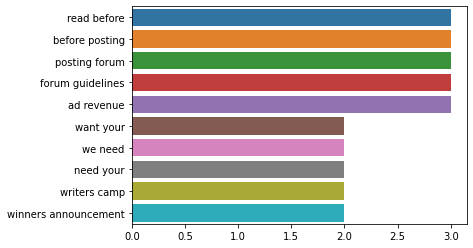

In [57]:
import seaborn as sns

top_n_bigrams=get_top_ngram(train['Topic Title'],2)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

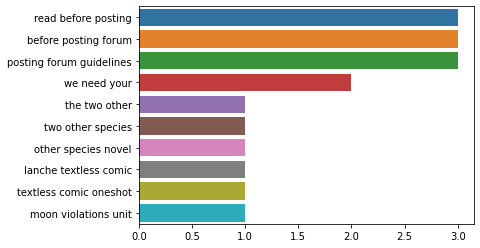

In [58]:
top_tri_grams=get_top_ngram(train['Topic Title'],n=3)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)

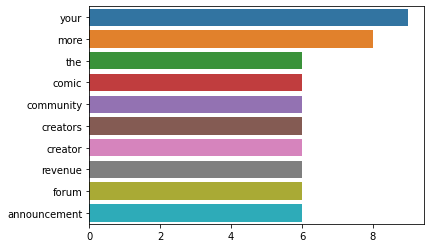

In [59]:
top_n_grams=get_top_ngram(train['Topic Title'],n=1)
x,y=map(list,zip(*top_n_grams))
sns.barplot(x=y,y=x)

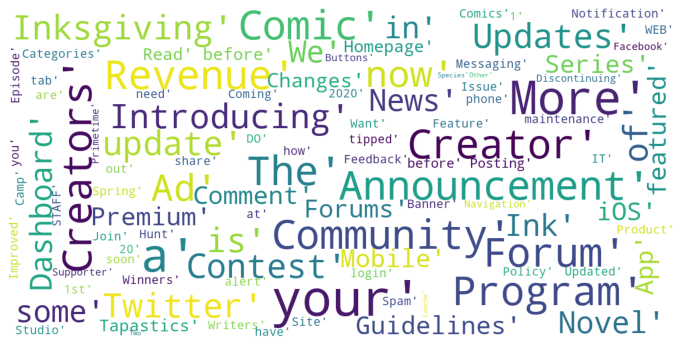

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus)